# **Import the libraries**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

# **Training Data and Testing Data**

In [47]:
#load the dataset

(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [48]:
print("x_train Datasets Shape for Mnist : {}".format(x_train.shape)) #60000 image with 28*28 pixels
print("x_test Datasets Shape for Mnist : {}".format(x_test.shape))
print("y_train Datasets Shape for Mnist : {}".format(y_train.shape))
print("y_test Datasets Shape for Mnist : {}".format(y_test.shape))

x_train Datasets Shape for Mnist : (60000, 28, 28)
x_test Datasets Shape for Mnist : (10000, 28, 28)
y_train Datasets Shape for Mnist : (60000,)
y_test Datasets Shape for Mnist : (10000,)


In [49]:
x_train[0].shape

(28, 28)

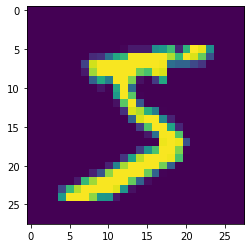

In [50]:
plt.imshow(x_train[0])


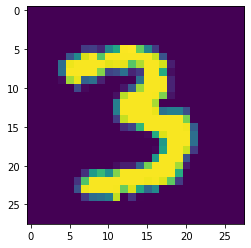

In [66]:
plt.imshow(x_test[500])

In [52]:
#Normalize the image
x_train = (x_train / 255)
x_test  = (x_test /255)

In [ ]:
x_test[8]

# **Generate the model**

In [53]:
model = Sequential()

# Input Layer
model.add(Dense(4, activation = "relu", input_shape = (28, 28)))

# Hidden Layer (number of layers = 4)
model.add(Dense(16, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Flatten())
# Output Layer
model.add(Dense(10, activation = "softmax"))

# **Compile the model**

In [54]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", 
              metrics=["accuracy"])

In [55]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 28, 4)             116       
                                                                 
 dense_7 (Dense)             (None, 28, 16)            80        
                                                                 
 dense_8 (Dense)             (None, 28, 32)            544       
                                                                 
 dense_9 (Dense)             (None, 28, 64)            2112      
                                                                 
 dense_10 (Dense)            (None, 28, 128)           8320      
                                                                 
 flatten_1 (Flatten)         (None, 3584)              0         
                                                                 
 dense_11 (Dense)            (None, 10)               

# **Fit the model**

In [56]:
#train the model
model.fit(x_train,to_categorical(y_train), epochs=10,
          batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3259 - accuracy: 0.9008
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1569 - accuracy: 0.9528
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1351 - accuracy: 0.9595
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1218 - accuracy: 0.9633
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1128 - accuracy: 0.9661
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1058 - accuracy: 0.9674
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0994 - accuracy: 0.9695
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0945 - accuracy: 0.9707
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0891 - accuracy: 0.9727
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

# **Evaluate the model**

In [57]:
#calculate the value of loss function and accuracy
evaluate = model.evaluate(x_test,to_categorical(y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.1225 - accuracy: 0.9653


In [58]:
evaluate 

[0.12253476679325104, 0.9653000235557556]

# **Predict the test data**

In [ ]:
pred = model.predict(x_test)
pred


In [67]:
np.argmax(pred[500]) #pred[500]=>3 and x_test[500]=>3

3

# **Confusion Matrix**

313/313 [==============================] - 2s 6ms/step


Text(69.0, 0.5, 'Truth Values')

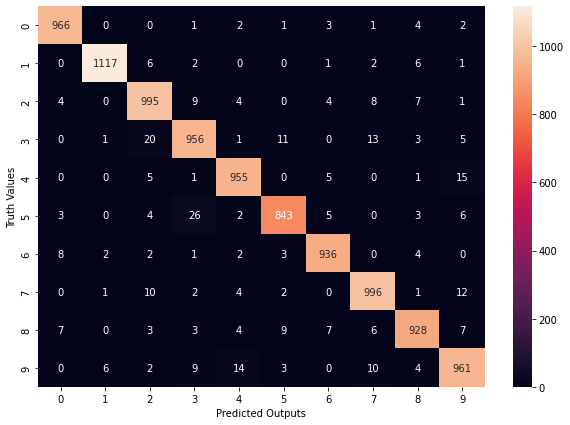

In [68]:
y_pred = model.predict(x_test)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')
     
